# Splitting a Validation Set

**by Dan Novischi**

In PyTorch splitting the data is accomplished by data sampler classes in `data.sampler` form the `torch.utils` package. While in PyTorch we must split the data manually, this is not much harder than what we're used to in sckit-learn.


To demonstrate we'll be using the `CIFAR10` dataset and the `SubsetRandomSampler` random sub-sampler class. More information about data samplers can be found [here](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler).

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms

from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

import matplotlib.pyplot as plt

As usual we're going to use `torchvision.datasets` to extract and transform our data as follows:

In [2]:
# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])

# choose the training and test datasets
train_set = datasets.CIFAR10('datasets', train=True,
                              download=True, transform=transform)

test_set = datasets.CIFAR10('datasets', train=False,
                             download=True, transform=transform)

To split the training data in actual training set and validation set we're going to define a split boundary based on a validation data percentage, as one might expect. We'll then use this boundary to define the two ranges of indexes for training and validation. Finally, we'll use the two ranges to define the appropriate loader objects by using the `SubsetRandomSampler` class.

**Note** The data loader `shuffle=True` constructor argument is mutually exclusive with the usage of a sampler. So we can use either one, but not both at the same time.

In [3]:
# number of subprocesses to use for data loading
num_workers = 0

# how many samples per batch to load
batch_size = 16

# percentage of training set to use as validation
valid_size = 0.2

# obtain training indices that will be used for validation
num_train = len(train_set)
indices = list(range(num_train))

# suffle indices
np.random.shuffle(indices)

# compute the size of the split in number of images
split = int(np.floor(valid_size * num_train))


# get indexes for the split
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, 
    num_workers=num_workers)

As expected, now we can get batches of data from the loaders in the usual manner:

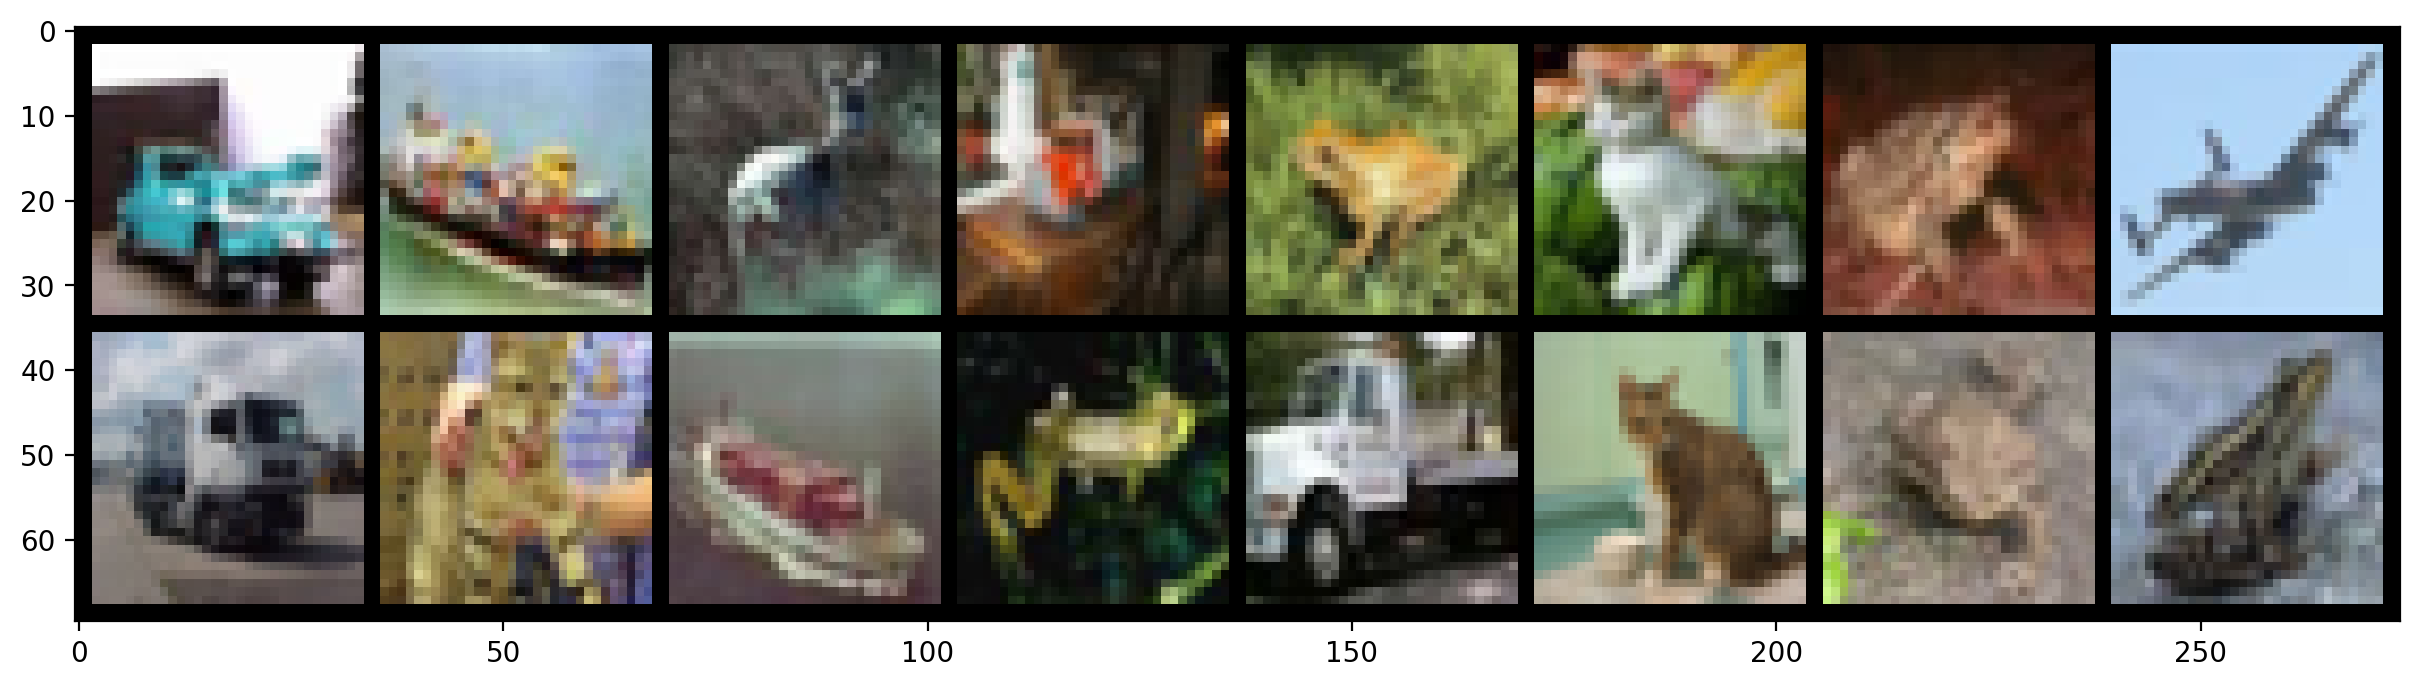

In [4]:
# batch from the train_loader
batch = next(iter(train_loader))
images, labels = batch

images = images / 2 + 0.5  # unnormalize
grid = torchvision.utils.make_grid(images, nrow=int(batch_size/2))

plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

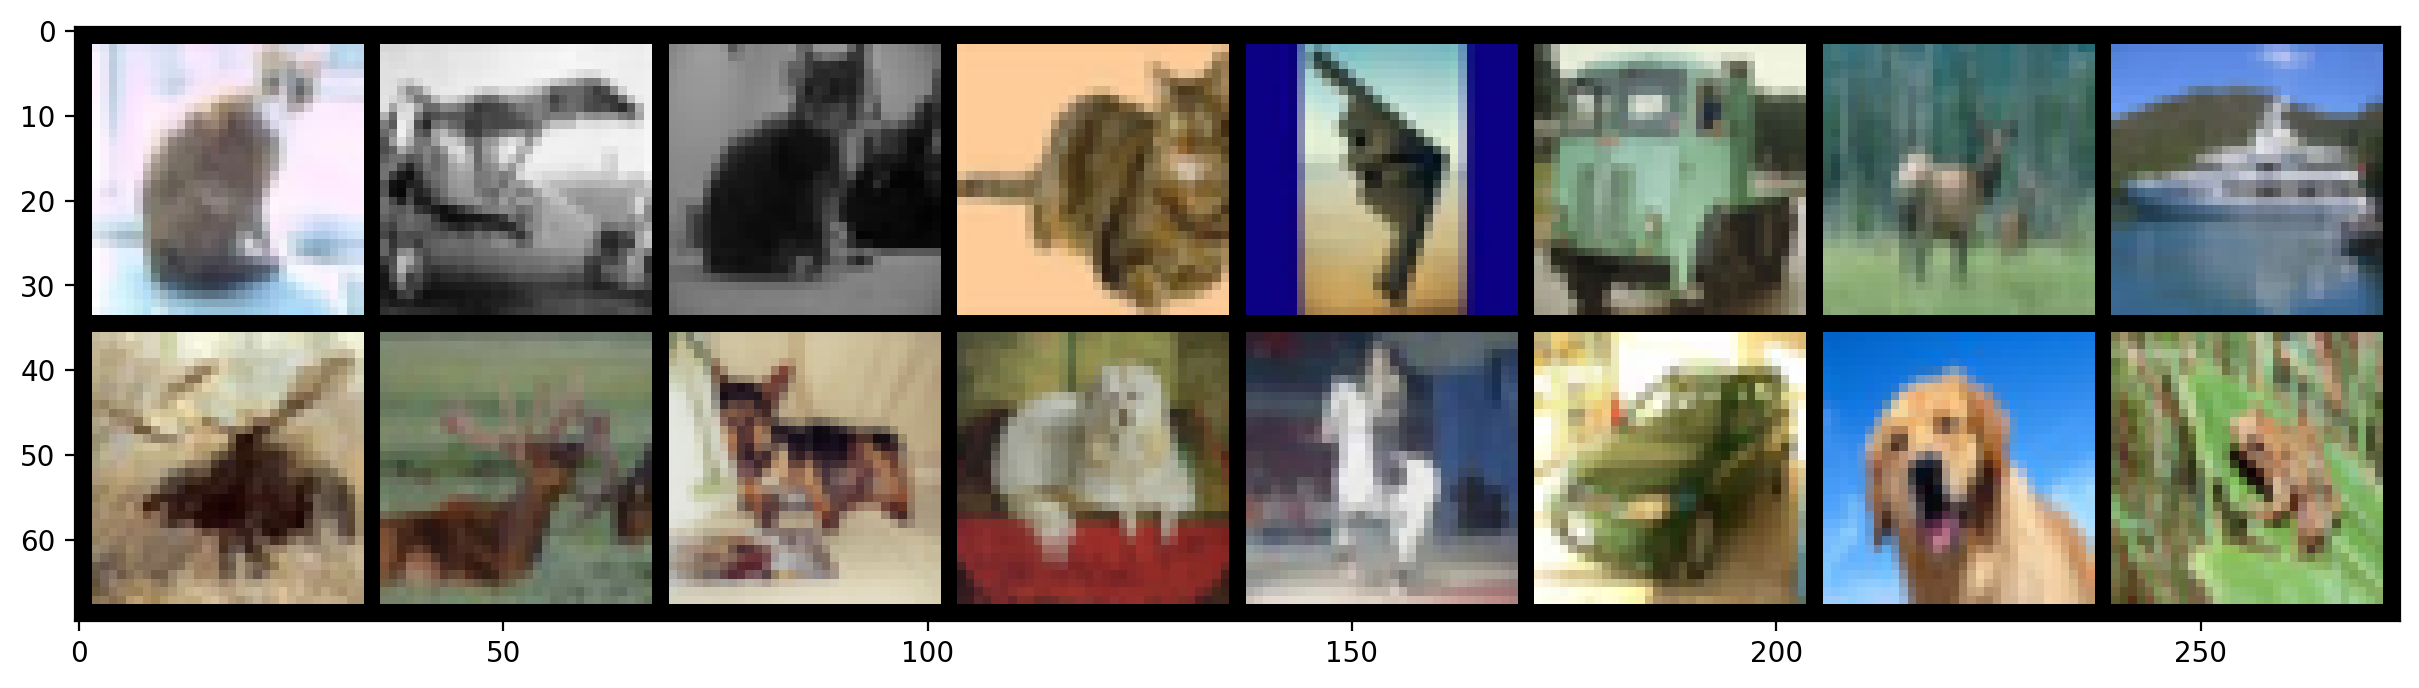

In [5]:
# batch from the train_loader
batch = next(iter(valid_loader))
images, labels = batch

images = images / 2 + 0.5  # unnormalize
grid = torchvision.utils.make_grid(images, nrow=int(batch_size/2))

plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

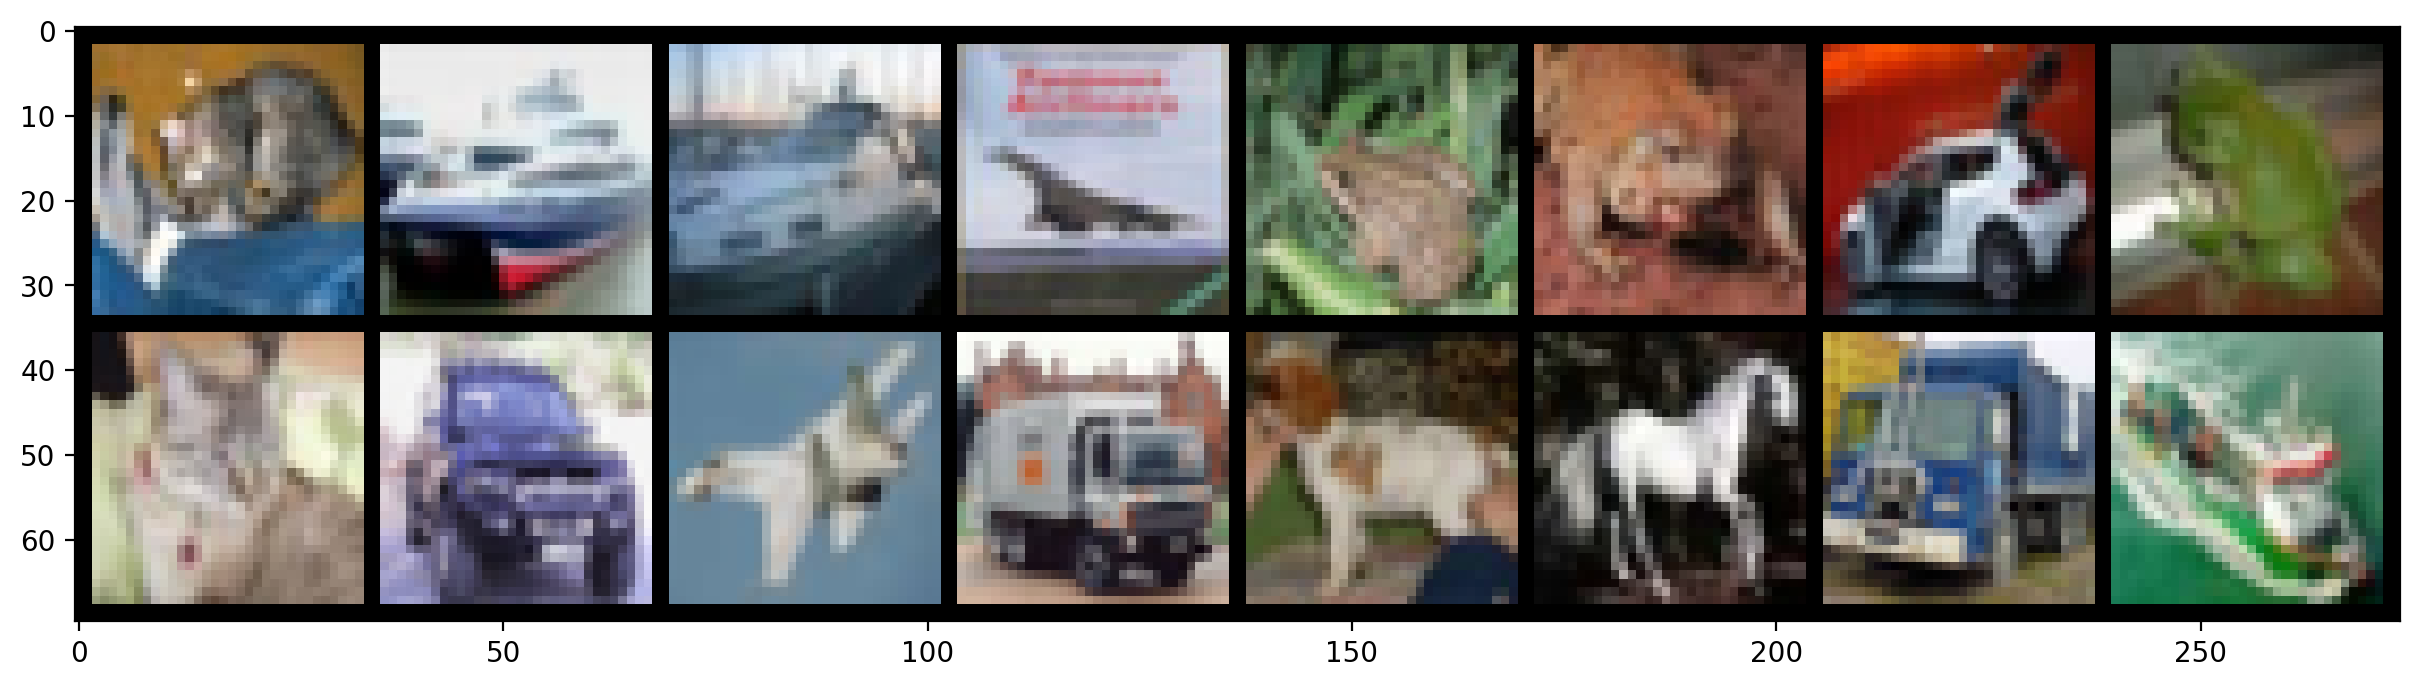

In [6]:
# batch from the train_loader
batch = next(iter(test_loader))
images, labels = batch

images = images / 2 + 0.5  # unnormalize
grid = torchvision.utils.make_grid(images, nrow=int(batch_size/2))

plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))